In [412]:
import numpy as np
import random
import itertools
import Levenshtein
import difflib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [444]:
class StringGenerator:

    def __init__(self, symbol_sets, len_seq, n_seq=6, n_rounds=1000):
        self.symbol_sets = symbol_sets
        self.len_seq = len_seq
        self.symbols = set.union(*symbol_sets)
        self.n_seq = n_seq
        self.n_rounds = n_rounds

    class Round:
        
        def __init__(self, symbol_sets, len_seq, n_seq=6):
            self.symbol_sets = symbol_sets
            self.len_seq = len_seq
            self.n_seq = n_seq
            self.sequences = self.round(n_seq)
            self.sequence_list = list(itertools.chain.from_iterable(self.sequences))
            self.pairs = list(itertools.combinations(self.sequence_list, 2))
            self.levenshtein = np.array([Levenshtein.distance(s1, s2) for s1, s2 in self.pairs])
            self.lcs = np.array([self.longest_common_substring(s1, s2) for s1, s2 in self.pairs])
            self.lcs_lengths = np.array([len(lcs) for lcs in self.lcs])

        @staticmethod
        def longest_common_substring(s1, s2):
            matcher = difflib.SequenceMatcher(None, s1, s2)
            match = matcher.find_longest_match(0, len(s1), 0, len(s2))
            return s1[match.a: match.a + match.size]

        def sequencer(self):
            permutations = ["".join(random.sample(list(symbol_set), self.len_seq)) for symbol_set in self.symbol_sets]
            return permutations
    
        def round(self, n_seq):
            sequences = []
            for _ in range(n_seq):
                sequences += [self.sequencer()]
            return sequences

    class Simulator:

        def __init__(self, parent, n_seq=6, n_rounds=1000):
            self.parent = parent
            self.n_seq = n_seq
            self.n_rounds = n_rounds
            self.levenshtein = None
            self.lcs = None
            self.lcs_length = None
            
        def run_simulation(self):
            all_levenshtein = []
            all_lcs = []
            all_lcs_length = []
            len_seq = self.parent.len_seq
            
            for _ in range(self.n_rounds):
                round_instance = self.parent.Round(self.parent.symbol_sets, self.parent.len_seq, self.n_seq)
                all_levenshtein.extend(round_instance.levenshtein)
                all_lcs.extend(round_instance.lcs)
                all_lcs_length.extend(round_instance.lcs_lengths)

            # Store the results as attributes of the instance
            self.levenshtein = np.array(all_levenshtein)
            self.similarity = np.array(all_levenshtein) / len_seq
            self.lcs = np.array(all_lcs)
            self.lcs_lengths = np.array(all_lcs_length)

            return (self.levenshtein, self.lcs, self.lcs_lengths)
            
            


In [445]:
def plot_simulation(simulation):
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Metric Distributions", fontsize=16)
    
    
    # Compute shared x and y ticks for the first two and last two plots
    x_ticks_1 = range(int(min(metric1)), int(max(metric1)) + 1)
    x_ticks_2 = range(int(min(metric3)), int(max(metric3)) + 1)
    y_max_1 = max(max(metric1), max(metric2))
    y_max_2 = max(max(metric3), max(metric4))

    metrics = [metric1, metric2, metric3, metric4]
    titles = ["Levenshtein Distance", "Longest Common Substring", "Similaity", "Longest Common Substring (normalized)"]

    for i, (metric, title) in enumerate(zip(metrics, titles)):
        ax = axes[i // 2, i % 2]
        sns.histplot(metric, discrete=True, bins=int(max(metric)-min(metric)+1), ax=ax)

        # Set shared ticks
        if i < 2:  # First row
            ax.set_xticks(x_ticks_1)
            ax.set_ylim(0, y_max_1)
        else:  # Second row
            ax.set_xticks(x_ticks_2)
            ax.set_ylim(0, y_max_2)

        ax.set_title(title, fontsize=14)
        ax.set_xlabel("Value", fontsize=12)

        for patch in ax.patches:
            height = patch.get_height()
            ax.annotate(f'{int(height)}', 
                        (patch.get_x() + patch.get_width() / 2., height),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [449]:
# Simulation

sets1 = [
    {'a','b','c','d'},
    {'c','d','e','f'},
    {'e','f','a','b'}
]

sets2 = [
    {'a','b','c','d','e','f'},
    {'d','e','f','g','h','i'},
    {'g','h','i','a','b','c'}
]

In [450]:
sg = StringGenerator(symbol_sets=sets2, len_seq=6)
simulator = sg.Simulator(sg)
sim1 = simulator.run_simulation()

AttributeError: 'tuple' object has no attribute 'levenshtein'

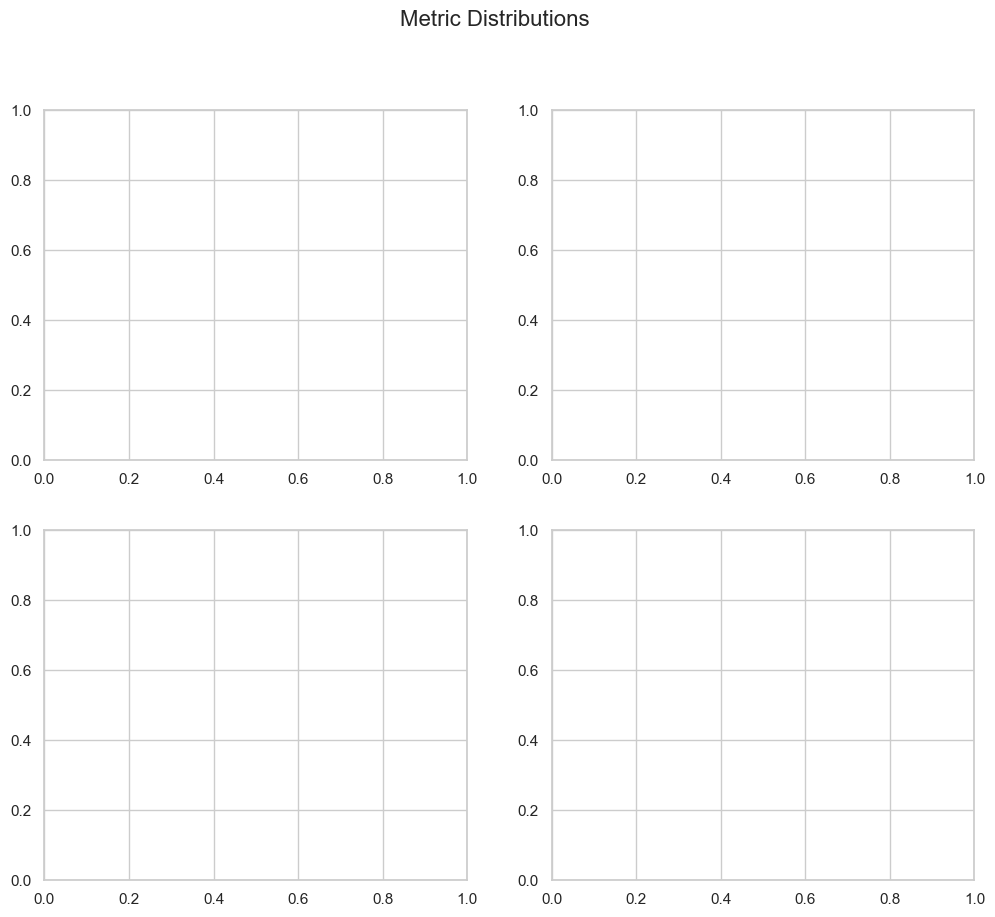

In [451]:
plot_simulation(sim1)